### Introdução

Os dados utilizados neste projeto foram extraídos do site [Investing.com](https://br.investing.com/indices/bovespa-historical-data), correspondendo a série histórica do Ibovespa, principal índice da bolsa de valores brasileira (B3). Esse índice mostra o desempenho médio das ações mais negociadas do mercado e é utilizado como referência para análises financeiras e indicadores econômicos.

O conjunto de dados apresenta as seguintes informações:

- Data;
- Último (preço de fechamento);
- Abertura;
- Máxima;
- Mínima;
- Volume;
- Variação (%).

A partir destes dados, é póssível realizar uma análise exploratória, identificar tendências de mercado e avaliar variações ao longo do tempo.

#### Entendendo o DataFrame

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [160]:
df = pd.read_csv("dados_ibovespa.csv")

#Verificando 5 primeiras linhas do Dataframe
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,09.07.2025,137.481,139.303,139.331,137.299,"7,58B","-1,31%"
1,08.07.2025,139.303,139.491,139.591,138.770,"6,75B","-0,13%"
2,07.07.2025,139.490,141.265,141.342,139.295,"6,12B","-1,26%"
3,04.07.2025,141.264,140.928,141.564,140.597,"3,31B","0,24%"
4,03.07.2025,140.928,139.051,141.304,139.051,"6,08B","1,35%"


In [161]:
#Verificando valores nulos

df.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [162]:
# Verificando Dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4953 non-null   object 
 1   Último    4953 non-null   float64
 2   Abertura  4953 non-null   float64
 3   Máxima    4953 non-null   float64
 4   Mínima    4953 non-null   float64
 5   Vol.      4952 non-null   object 
 6   Var%      4953 non-null   object 
dtypes: float64(4), object(3)
memory usage: 271.0+ KB


Utilizamos o "dados.info()" para verificar os tipos de dados que temos na base. 
Verificamos que a coluna "Data" está como "object", então fizemos a conversão dela para o tipo "datetime" e depois definimos essa coluna como índice do DataFrame ordenando os dados em sequência cronológica.

In [163]:
#Convertendo a coluna "Data" em datetime
df["Data"] = pd.to_datetime(df["Data"], format = '%d.%m.%Y', errors='coerce')

#Definindo a coluna "Data" como índece e ordenando-a
df = df.set_index('Data').sort_index()

# Reindexando para ter uma linha por dia, preenchendo valores ausentes com o último valor disponível
df = df.asfreq('D', method='ffill')

# Preenchendo valores ausentes nas outras colunas com o último valor
for column in df.columns:
    df[column] = df[column].fillna(method='ffill')

# Resetar o índice
df.reset_index(inplace=True)


C:\Users\maria\AppData\Local\Temp\ipykernel_18732\3330368162.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].fillna(method='ffill')


In [164]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2005-07-11,25.016,24.425,25.032,24.425,"100,42M","2,43%"
1,2005-07-12,25.536,25.027,25.576,24.932,"94,91M","2,08%"
2,2005-07-13,25.856,25.557,26.043,25.557,"107,28M","1,25%"
3,2005-07-14,25.920,25.859,26.142,25.725,"113,35M","0,25%"
4,2005-07-15,25.222,25.916,25.916,25.222,"72,88M","-2,69%"


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      7304 non-null   datetime64[ns]
 1   Último    7304 non-null   float64       
 2   Abertura  7304 non-null   float64       
 3   Máxima    7304 non-null   float64       
 4   Mínima    7304 non-null   float64       
 5   Vol.      7304 non-null   object        
 6   Var%      7304 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 399.6+ KB


In [166]:
# Add coluna categórica
df['serie_id'] = 'ibovespa'

In [167]:
#Renomeando colunas 
df = df.rename(columns={'Data': 'dt', 'Último': 'y'})

#Mantendo apenas as colunas necessárias para análise
df = df[['dt', 'y', 'serie_id']]

df.head()

,dt,y,serie_id
0,2005-07-11,25.016,ibovespa
1,2005-07-12,25.536,ibovespa
2,2005-07-13,25.856,ibovespa
3,2005-07-14,25.920,ibovespa
4,2005-07-15,25.222,ibovespa


A ideia aqui foi definir uma nova coluna (serie_id) e manter no dataframe apenas as colunas importantes para a análise

In [168]:
# Criando novo dataframe com colunas de interesse
df1 = df[['dt', 'y']].set_index('dt')

In [169]:
df1.head()

,y
dt,
2005-07-11,25.016
2005-07-12,25.536
2005-07-13,25.856
2005-07-14,25.920
2005-07-15,25.222


### Análise Inicial

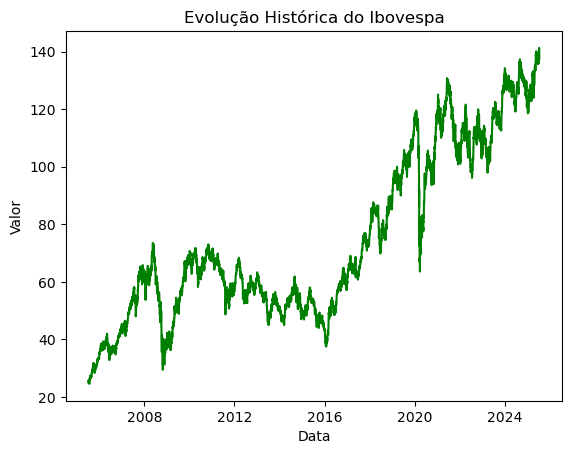

In [170]:
plt.plot(df1.index, df1["y"], color='green')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Evolução Histórica do Ibovespa')
plt.show()

O gráfico acima apresenta a evolução diária do índice Ibovespa ao longo dos últimos anos, permitindo observar seu comportamento e identificar possíveis padrões sazonais.

##### Decomposição da Série Temporal

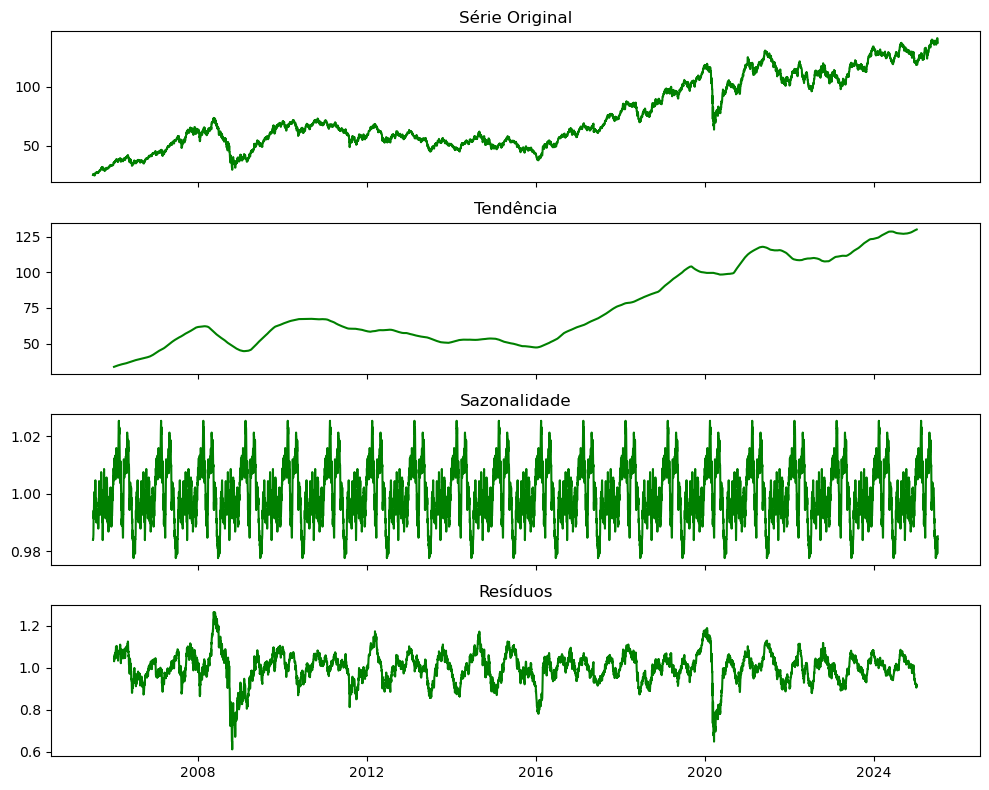

In [174]:
result = seasonal_decompose(df1["y"], model="multiplicative", period=365)
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axs[0].plot(result.observed, color='green')
axs[0].set_title('Série Original')

axs[1].plot(result.trend, color='green')
axs[1].set_title('Tendência')

axs[2].plot(result.seasonal, color='green')
axs[2].set_title('Sazonalidade')

axs[3].plot(result.resid, color='green')
axs[3].set_title('Resíduos')

plt.tight_layout()
plt.show()

A série tem uma tendência de crescimento ao longo do tempo. Os picos e vales também aumentam junto com o valor geral da série. Como o comportamento sazonal cresce proporcionalmente ao valor da série, o modelo multiplicativo consegue representar melhor, onde a sazonalidade escala junto com a tendência.

##### Verificação de Estacionaridade

In [175]:
X = df1.y.values

result = adfuller(X)
print('Teste ADF: %f' % result[0])
print('p-value: %f' % result[1])
print('Valores Críticos:')

for key, value in result[4].items():
    print(f'   {key}: {value}')

     

Teste ADF: -1.124619
p-value: 0.705155
Valores Críticos:
   1%: -3.4312475857208686
   5%: -2.861936663242156
   10%: -2.566981139603197


O teste ADF verifica se uma série temporal é estacionária, ou seja, se suas propriedades estatísticas (como média e variância) não mudam ao longo do tempo. Com base nos valores da verificação, a série não é estacionária.

--------------
- ADF Statistic:	Valor do teste, quanto mais negativo, maior a chance da série ser estacionária.
- p-value:	Se for menor que 0.05, geralmente consideramos a série estacionária.
- Critical Values:	Valores de referência (níveis de significância de 1%, 5% e 10%) para comparar com o ADF Statistic. Se o ADF for menor que esse valor, a série é estacionária com aquele grau de confiança.
---------------

#### Análise de Tendência

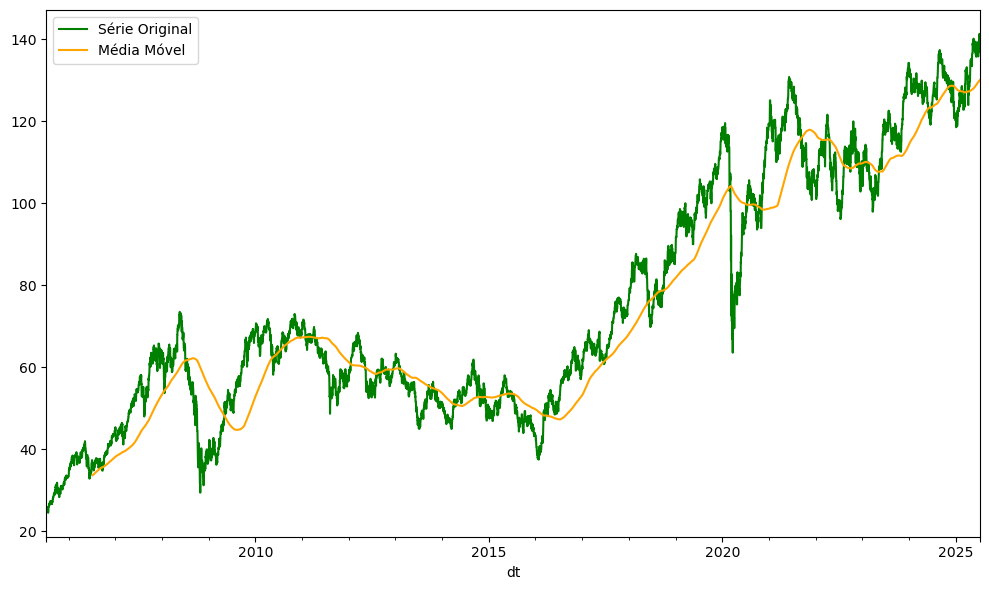

In [177]:
# Calcular média móvel com janela menor
ma = df1['y'].rolling(window=365).mean()

# Criar o gráfico
f, ax = plt.subplots(figsize=(10,6))
df1['y'].plot(ax=ax, label='Série Original', color='green')
ma.plot(ax=ax, label='Média Móvel', color='orange')
plt.legend()
plt.tight_layout()

Nesta análise, calculamos a média móvel utilizando uma janela de 365 dias para observar o comportamento dos dados ao longo do tempo. Através dessa média, podemos identificar uma tendência de crescimento nos dados.

Além da tendência de alta, é possível observar três quedas acentuadas na série histórica:

- 2008: Queda provocada pela crise financeira global, desencadeada pela falência do Lehman Brothers e o colapso do mercado imobiliário nos Estados Unidos.
- 2016: Redução associada à crise política e econômica no Brasil, marcada pela recessão e pelo processo de impeachment da presidente Dilma Rousseff.
- 2020: Forte recuo devido à pandemia de COVID-19, que gerou incertezas nos mercados globais e queda na bolsa de valore.

Esses eventos destacam como fatores externos e internos podem impactar significativamente o desempenho do mercado, mesmo em períodos de tendência de crescimento.

### Preparação do Modelo